In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head
df.dtypes
# df.select_dtypes('object').nunique()

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
X = df.drop('stroke', axis=1)
y = pd.DataFrame(df['stroke'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)
sample_row = X.iloc[0,:].to_dict()

# EDA

In [16]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


/tmp/ipykernel_92569/3000402441.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)
/tmp/ipykernel_92569/3000402441.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)
/tmp/ipykernel_92569/3000402441.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)
/tmp/ipykernel_92569/3000402441.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)
/tmp/ipykernel_92569/3000402441.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.

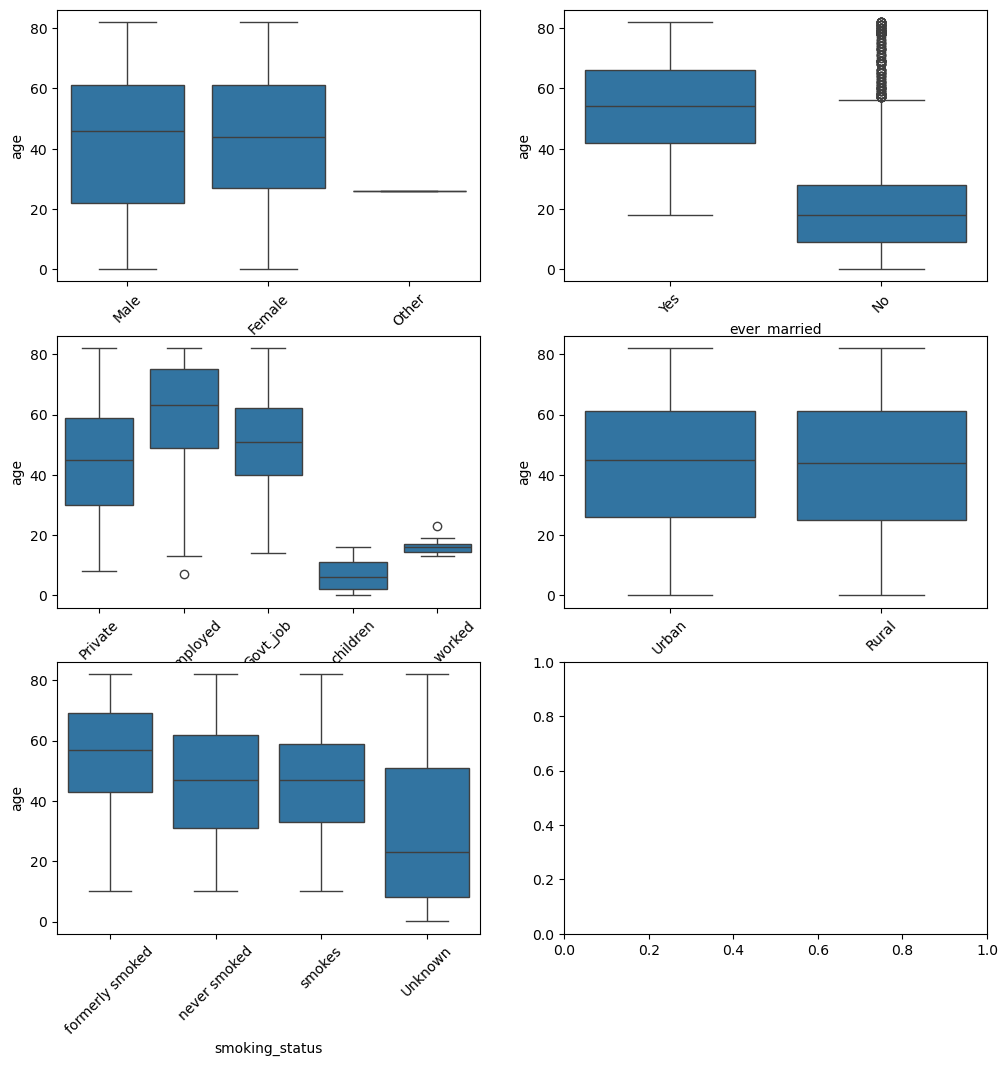

In [42]:
cat_cols = list(df.dtypes[df.dtypes == 'object'].keys())

f, ax = plt.subplots(3,2, figsize=(12,12))

for i, col in enumerate(cat_cols):
    g = sns.boxplot(x=col, y='age', data=df, ax=ax[(i//2)%3][i%2])
    g.set_xticklabels(g.get_xticklabels(), rotation=45)

/tmp/ipykernel_92569/97487455.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)
/tmp/ipykernel_92569/97487455.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)
/tmp/ipykernel_92569/97487455.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)
/tmp/ipykernel_92569/97487455.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)
/tmp/ipykernel_92569/97487455.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after s

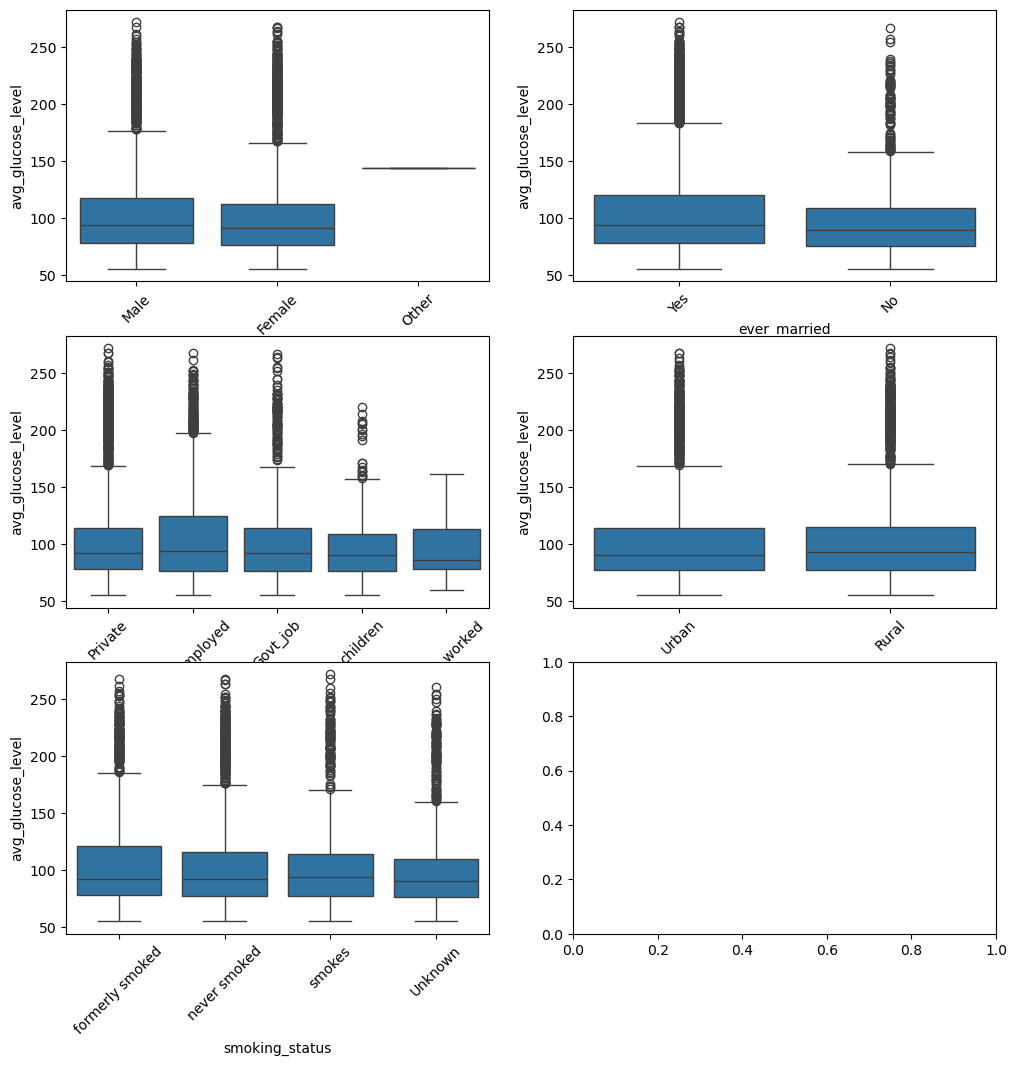

In [41]:
cat_cols = list(df.dtypes[df.dtypes == 'object'].keys())

f, ax = plt.subplots(3,2, figsize=(12,12))

for i, col in enumerate(cat_cols):
    g = sns.boxplot(x=col, y='avg_glucose_level', data=df, ax=ax[(i//2)%3][i%2])
    g.set_xticklabels(g.get_xticklabels(), rotation=45)

<Axes: xlabel='gender'>

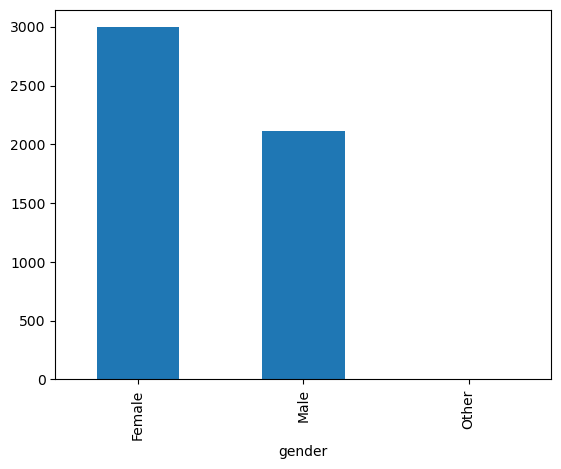

In [40]:
df.gender.value_counts().plot(kind='bar')

# Training

In [5]:
preprocessing = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False), list(df.select_dtypes('object'))),
    remainder='passthrough'
)

model = XGBClassifier()

pipeline = make_pipeline(
    preprocessing,
    model
)

pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_valid)

print(f'accuracy: {accuracy_score(y_valid, preds)}')

accuracy: 0.9478147423352903


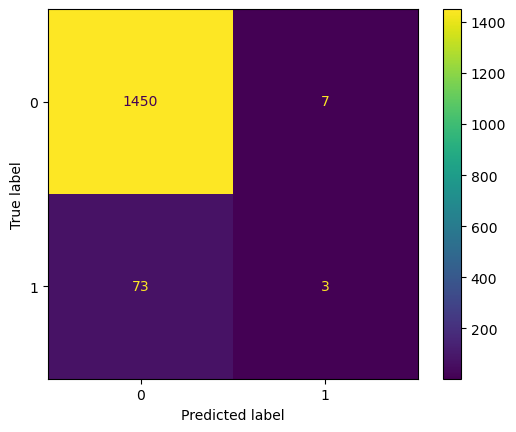

In [6]:
cm = confusion_matrix(y_valid, preds)
ConfusionMatrixDisplay(cm).plot()

In [14]:
import pickle
with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [15]:
from pydantic import BaseModel, ValidationError

class Symptoms(BaseModel):
    id: int
    gender: object
    age: float
    hypertension: int
    heart_disease: int
    ever_married: object
    work_type: object
    Residence_type: object
    avg_glucose_level: float
    bmi: float
    smoking_status: object

with open('pipeline.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

print(sample_row)
symptom = Symptoms(**sample_row)
inputs = pd.DataFrame([symptom.model_dump()])
pred = loaded_pipeline.predict(inputs)[0]
pred

{'id': 9046, 'gender': 'Male', 'age': 67.0, 'hypertension': 0, 'heart_disease': 1, 'ever_married': 'Yes', 'work_type': 'Private', 'Residence_type': 'Urban', 'avg_glucose_level': 228.69, 'bmi': 36.6, 'smoking_status': 'formerly smoked'}


1

In [8]:
from flask import Flask, jsonify, request

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        symptoms = Symptoms(**request.json)
        inputs = pd.DataFrame([symptoms.model_dump()])
        # print(inputs)
        pred = loaded_pipeline.predict(inputs)[0]
        response = {
            'prediction': int(pred)
        }
        return jsonify(response), 200
    except ValidationError as e:
        return jsonify(e.errors()), 400

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
